In [40]:
#import required libraries
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [41]:
# reading csv file 
data=pd.read_csv("epl_soccer_data.csv")
data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [42]:
data.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


<AxesSubplot:>

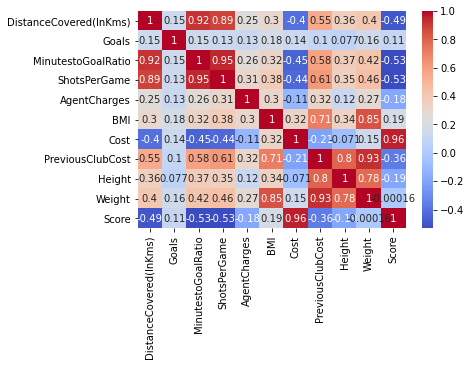

In [43]:
# visualizing data for understanding relationship b/w features
sn.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [44]:
#checking missing values
data.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

In [45]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit and transform the 'fruits' column
data['club'] = le.fit_transform(data['Club'])
# print the encoded values
print(data['club'])

0      2
1      2
2      2
3      2
4      2
      ..
197    1
198    1
199    1
200    1
201    1
Name: club, Length: 202, dtype: int32


In [46]:
data.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,club
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426,0.905941
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826,0.820183
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000,0.000000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000,0.000000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000,1.000000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000,2.000000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000,2.000000


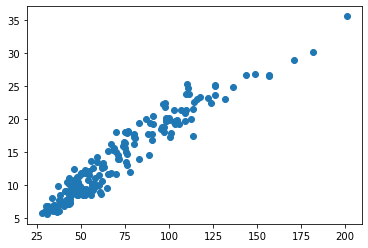

In [65]:
plt.scatter(data['Cost'],data['Score'])
plt.show()

In [47]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x = data["Cost"]
y = data["Score"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
import scipy
import statsmodels.api as sm
from scipy import stats

In [49]:
## using ols 
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
X_test = sm.add_constant(X_test)
pred=model.predict(X_test)
pred

95      7.803126
15     19.162498
30     19.144087
159    11.024990
186    14.743942
115     9.331210
69     20.948331
172     9.607370
161    21.482240
45     21.758400
66     12.295325
150     6.477559
166     6.459149
78     14.375729
195    14.707120
200    11.890291
56     13.455196
153     6.772130
82     11.706184
68     11.430024
125    10.491081
16     23.949267
184    19.309783
93      9.533727
65     10.435849
60     17.008452
84      9.975583
67      9.957172
126     8.705248
140     7.048289
9      12.755591
18     18.812695
55     37.738845
75      6.993057
164     7.932001
104     8.226571
136    12.019165
138    10.748830
165     9.018229
76      8.778891
79      7.545377
dtype: float64

In [56]:
#using linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
lpred=lm.predict(X_test)
lpred

array([ 7.80312604, 19.16249782, 19.14408717, 11.02499   , 14.74394154,
        9.33121009, 20.94833099,  9.60736986, 21.48223987, 21.75839964,
       12.29532493,  6.47755916,  6.4591485 , 14.37572851, 14.70712024,
       11.8902906 , 13.45519595,  6.77212957, 11.70618409, 11.43002432,
       10.49108111, 23.94926713, 19.30978303,  9.53372725, 10.43584916,
       17.00845163,  9.97558288,  9.95717223,  8.70524795,  7.04828934,
       12.75559121, 18.81269545, 37.73884487,  6.99305739,  7.9320006 ,
        8.22657102, 12.01916516, 10.74883023,  9.01822902,  8.77889055,
        7.54537692])

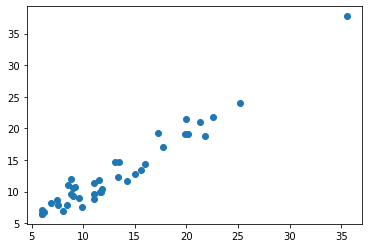

In [57]:
plt.scatter(y_test,pred)
plt.show()

In [58]:
#assumptions testing

In [59]:
#Independence assumption
#it assumes that the errors are not related to one another and are not influenced by previous errors
#One way to test for independence is to plot the residuals against a predicted values

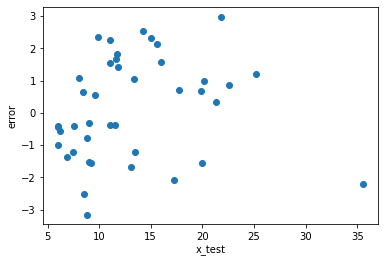

In [54]:
error=y_test-lpred
plt.xlabel('x_test')
plt.ylabel('error')
plt.scatter(y_test,error)
plt.show()

In [63]:
## evaluation metrics 
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, lpred)
print("R-squared:", r2)

mse = mean_squared_error(y_test,lpred)
print("MSE:", mse)

# RMSE
rmse = mean_squared_error(y_test, lpred, squared=False)
print("RMSE:", rmse)

R-squared: 0.9370610435672848
MSE: 2.418237176892383
RMSE: 1.5550682225845858
